# Lab 7: Calculating Determinants
     
MTH 308: Applied Linear Algebra <br>
Spring 2022

Lab parts: 
- Part 1: Introduciton to recursion, Exercise 1
- Part 2: Recursive determinant calculation, Exercise 2
- Part 3: Experimenting with determinants, Exercise 3

## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

## Part 1: Introduction to recursion, Exercise 1

Here we explore the concept of recursion in computer programming by
- Translating pseudocode to R to decipher a recursive function
- Write a recursive function to compute $n!$

#### Recursion introduction

In programming, recursion is a method for solving a problem where the solution depends on smaller instances of the same problem. For example, factorials are computed as
$$
n! = n(n-1)(n-2)\dots 3 \cdot 2 \cdot 1
$$
This problem can be rephrased in terms of itself as
$$
n! = n(n-1)!
$$
By building a function to compute $n!$ which calls itself to compute $(n-1)!$, recursion can be implemented. Though, the function will need to know when to stop calling itself (called a base case) and collect all computations. For the $n!$ example, the base case would be when the function arrives at $1!=1$.
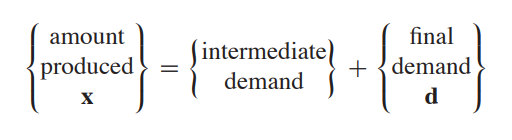

#### Exercise 1: Mystery recursion and recursion beginnings

Below is a sample Matlab code which implements recursion. Translate this code to R and get it to execute on multiple examples. Comment each part of your code to explain the functionality. Finally, rename the function to better suit its purpose.

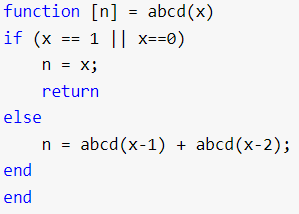
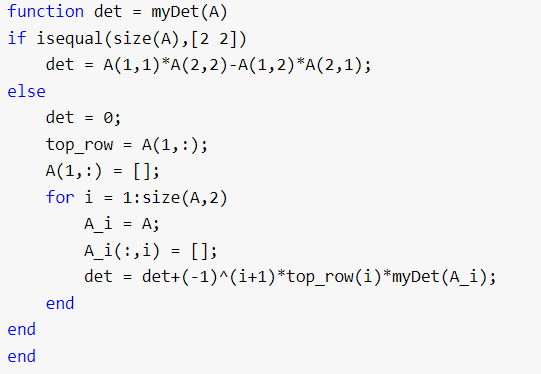
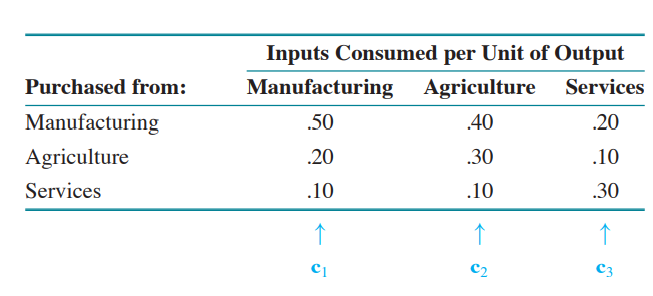

In [1]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

abcd <- function(x){
    if(x==1 | x==0){
        n <- x
        return(x)
    } else {
        n <- abcd(x-1)+abcd(x-2)
    }
}

# test out the mystery function
for (i in c(0:10)){
    print(abcd(i))
}

print("This is the Fibonacci sequence!")

# end of your code
##########################

[1] 0
[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34
[1] 55


[1] "This is the Fibonacci sequence!"


Create your own recursive function to compute $n!$ as discussed above. Test this function for multiple values of $n$.

In [2]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

factorial <- function(n){
    if(n==1){
        result <- n
        return(result)
    } else {
        result <- n*factorial(n-1)
    }
}

# test out the factorial function
for (i in c(1:10)){
    print(factorial(i))
}

print("Sure looks factorialish.")

# end of your code
##########################

[1] 1
[1] 2
[1] 6
[1] 24
[1] 120
[1] 720
[1] 5040
[1] 40320
[1] 362880
[1] 3628800


[1] "Sure looks factorialish."


## Part 2: Recursive determinant calculation, Exercise 2

In class, we showed the determinant of matrix $A$ can be computed by expanding across the first row as below.
</br>
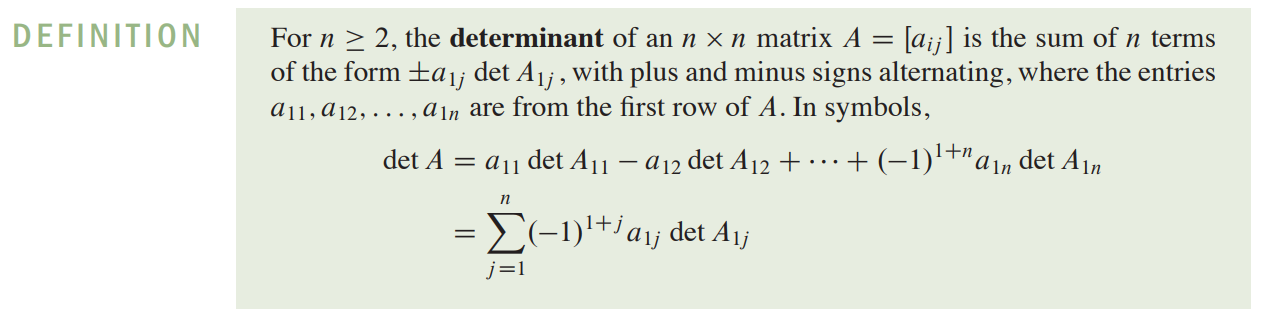
</br>
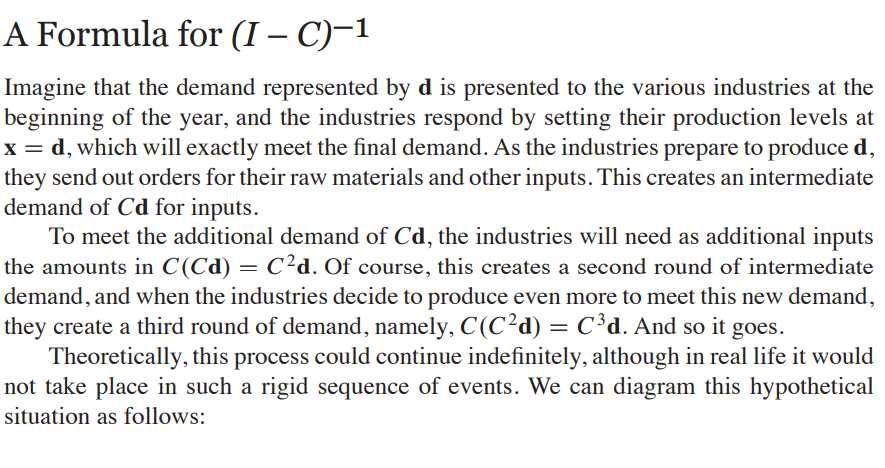
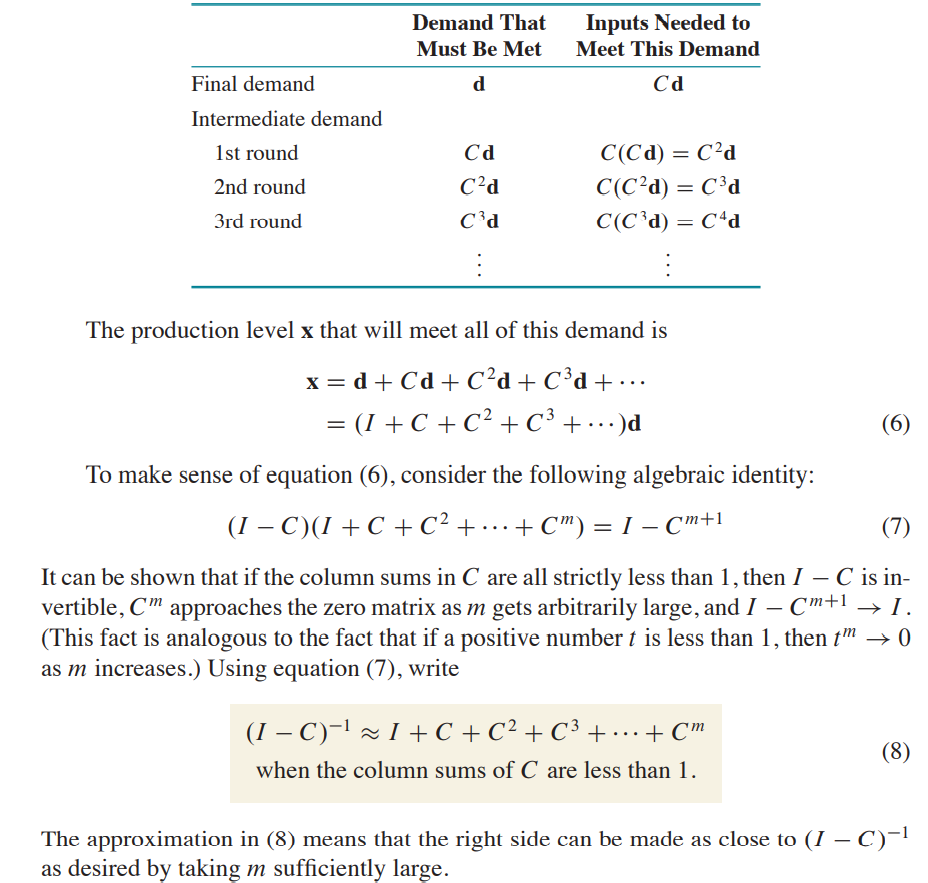
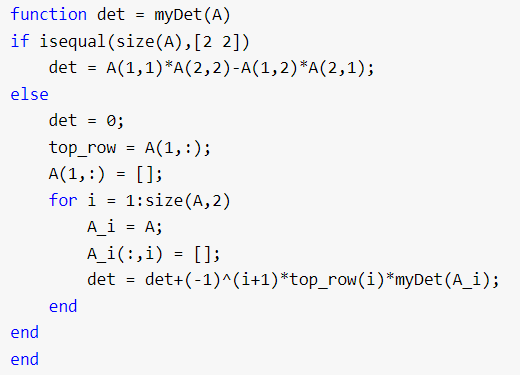

#### Exercise 2: Coding the determinant

This calculation can be programmed recursively as in the below Matlab code.
</br>
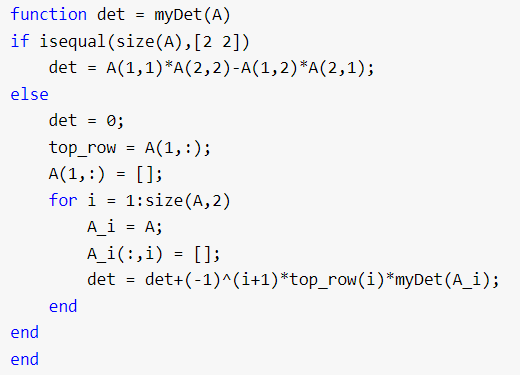
</br>
Implement this function in the below coding block. Test your function using multiple examples. Add comments to explain why you are confident your function is working correctly.

In [3]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

myDet <- function(A){
    if (nrow(A)==2){
        det <- A[1,1]*A[2,2]-A[1,2]*A[2,1]
        return(det)
    } else {
        det <- 0
        top_row <- A[1,]
        A <- A[-1,]
        for (i in 1:ncol(A)){
            Ai <- A
            Ai <- Ai[,-i]
            det <- det+(-1)^(i+1)*top_row[i]*myDet(Ai)
        }
        return(det)
    }
}

print("EXAMPLE 1")
A <- matrix(c(1,2,3,4), nrow=2, byrow=TRUE)
print(A)
print(myDet(A))

print("EXAMPLE 2")
A <- matrix(c(1,5,0,2,4,-1,0,-2,0), nrow=3, byrow=TRUE)
print(A)
print(myDet(A))

library(matlib)
print("EXAMPLE 3")
A <- matrix(sample.int(100, size = 5*5, replace = TRUE), nrow = 5, ncol = 5)
print(A)
print(myDet(A))
print("Compare my function to matlib package Det(A) function")
print(Det(A))

# end of your code
##########################

[1] "EXAMPLE 1"


     [,1] [,2]
[1,]    1    2
[2,]    3    4


[1] -2


[1] "EXAMPLE 2"


     [,1] [,2] [,3]
[1,]    1    5    0
[2,]    2    4   -1
[3,]    0   -2    0


[1] -2


Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”


Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


[1] "EXAMPLE 3"


     [,1] [,2] [,3] [,4] [,5]
[1,]   93   83   70   92   59
[2,]   20   63   35   67   94
[3,]   38   61   31   39   86
[4,]    2    5   58   24   55
[5,]   94   91   99   25   79


[1] -499875440


[1] "Compare my function to matlib package Det(A) function"


[1] -499875440


## Part 3: Experimenting with determinants, Exercise 3

The determiant characterizes if a matrix is singular or not, but it does not measure how close to singular it is. The below experiment illustrates this fact. If you are interested, the condition number of a matrix is a measure of how close to singular a matrix is: https://en.wikipedia.org/wiki/Condition_number#Matrices.

#### Exercise 3: Determinants and invertibility
Use the follwoing coding block to solve the following question from the text. Give a discussion of your findings in the subsequent coding block. Compare your findings to the Hilbert matrix as seen in previous labs.
</br>
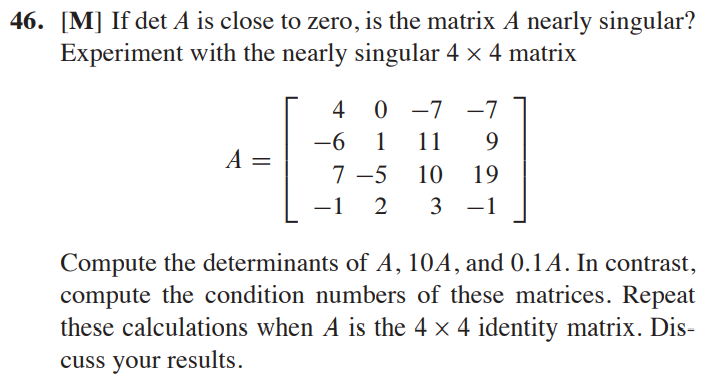
</br>

In [4]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

A <- matrix(c(4,0,-7,-7,
             -6,1,11,9,
             7,-5,10,19,
             -1,2,3,-1), nrow=4, byrow=TRUE)
print(det(A))
print(kappa(A))
print(det(10*A))
print(kappa(10*A))
print(det(0.1*A))
print(kappa(0.1*A))

library(matrixcalc)
print("Hilbert matrix example")
for (n in c(5,10,15,20)){
    print(paste("n=",n))
    H <- hilbert.matrix(n)
    print(det(H))
    print(kappa(H))
}
# end of your code
##########################


[1] 1


[1] 48999.72


[1] 10000


[1] 48999.72


[1] 1e-04


[1] 48999.72



Attaching package: ‘matrixcalc’




The following object is masked from ‘package:matlib’:

    vec




[1] "Hilbert matrix example"


[1] "n= 5"
[1] 3.749295e-12
[1] 640356.4
[1] "n= 10"
[1] 2.164388e-53
[1] 2.416148e+13
[1] "n= 15"
[1] -5.470279e-120
[1] 1.634382e+17
[1] "n= 20"
[1] 3.893062e-194
[1] 1.549688e+18


#### Solution explanation.

Explain your findings in the above coding block here.